# K-Means Clustering Assignments

**Student ID:** 63130500113

**Student Name:** Sahathat Yingsakulkiet

---

## Assignment 1: Clustering Synthetic Data 2D Using Silhouette Coefficient

### Objective:
Understand the concept of K-means clustering and determine the optimal number of clusters using the Silhouette Coefficient.

### Tasks:
1. Generate a synthetic 2D dataset with 4-5 distinct clusters using libraries like `sklearn.datasets.make_blobs`.
2. Visualize the dataset using a scatter plot.
3. Implement K-means clustering for a range of cluster numbers (e.g., 2 to 10).
4. For each cluster number, compute the Silhouette Coefficient.
5. Plot the Silhouette Coefficient values against the number of clusters to visualize the optimal number of clusters.
6. Visualize the clusters for the optimal number of clusters using a scatter plot.
7. Write a brief report discussing your findings.

---

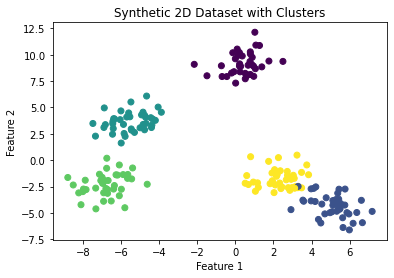

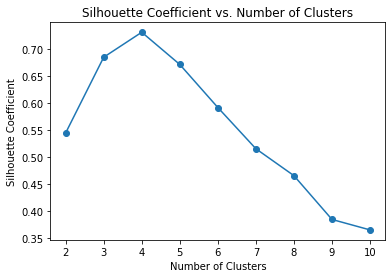

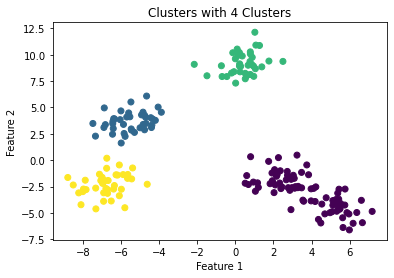

Optimal number of clusters: 4
Silhouette Coefficient for optimal clusters: 0.7314729766657573


In [27]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Generate synthetic dataset
n_samples = 200
n_features = 2 # (x,y)
n_clusters = 5
random_state = math.floor(10000*random.random())

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Step 2: Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Synthetic 2D Dataset with Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 3 and 4: K-means clustering and Silhouette Coefficient
range_clusters = range(2, 11)
silhouette_scores = []

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Step 5: Plot Silhouette Coefficient vs. Number of Clusters
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Coefficient vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.xticks(range_clusters)
plt.show()

# # Step 6: Visualize clusters for the optimal number of clusters
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
optimal_kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=random_state)
optimal_cluster_labels = optimal_kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=optimal_cluster_labels, cmap='viridis')
plt.title(f"Clusters with {optimal_n_clusters} Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# # Step 7: Write a brief report
print(f"Optimal number of clusters: {optimal_n_clusters}")
print(f"Silhouette Coefficient for optimal clusters: {max(silhouette_scores)}")


## Assignment 2: Clustering Synthetic Data 2D Using Inertia

### Objective:
Understand the concept of K-means clustering and determine the optimal number of clusters using inertia.

### Tasks:
1. Generate a synthetic 2D dataset with 4-5 distinct clusters using libraries like `sklearn.datasets.make_blobs`.
2. Visualize the dataset using a scatter plot.
3. Implement K-means clustering for a range of cluster numbers (e.g., 2 to 10).
4. For each cluster number, compute the inertia.
5. Plot the inertia values against the number of clusters to visualize the "elbow" point.
6. Visualize the clusters for the optimal number of clusters using a scatter plot.
7. Write a brief report discussing your findings.

---

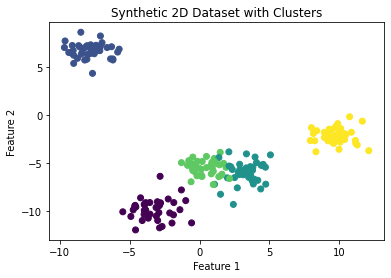

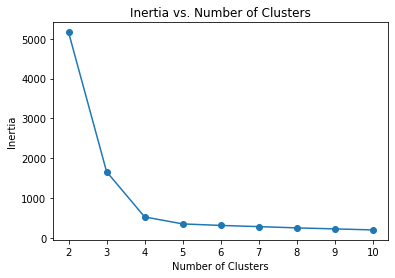

Optimal number of clusters: 3


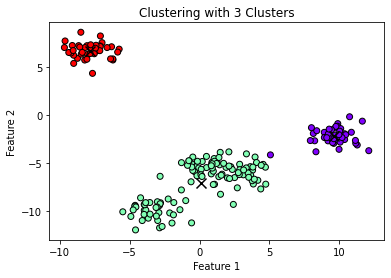

Report:
The optimal number of clusters appears to be around 3
This is determined by observing the 'elbow' point in the Inertia vs. Number of Clusters plot.
The scatter plot with optimal clusters shows how the data points are grouped.


In [50]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic dataset
n_samples = 200
n_features = 2 # (x,y)
n_clusters = 5
random_state = math.floor(10000*random.random())

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Step 2: Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Synthetic 2D Dataset with Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 3 and 4: K-means clustering and Silhouette Coefficient
range_clusters = range(2, 11)
inertia_scores = []

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(X)
    inertia_avg = kmeans.inertia_
    inertia_scores.append(inertia_avg)

plt.plot(range(2, 11), inertia_scores, marker='o')
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()
    
# Step 5: Find the "elbow" point (optimal number of clusters)
# It's often where the inertia starts to decrease more slowly
# In this simple example, we'll just look for the point of maximum curvature
curvature = np.diff(inertia_scores, 2)
optimal_clusters = curvature.argmax() + 3

print("Optimal number of clusters:", optimal_clusters)

# Step 6: Visualize clusters for the optimal number of clusters
best_kmeans = KMeans(n_clusters=optimal_clusters, random_state=random_state)
best_kmeans.fit(X)
labels = best_kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, marker='o', edgecolors='k', cmap='rainbow')
plt.scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1], c='black', marker='x', s=100)
plt.title(f"Clustering with {optimal_clusters} Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 7: Write a brief report discussing your findings
print("Report:")
print("The optimal number of clusters appears to be around", optimal_clusters)
print("This is determined by observing the 'elbow' point in the Inertia vs. Number of Clusters plot.")
print("The scatter plot with optimal clusters shows how the data points are grouped.")

## Assignment 3: Segmenting Patients

### Objective:
Segment patients based on selected health metrics.

### Dataset Suggestion:
Diabetes dataset from UCI Machine Learning Repository.

### Tasks:
1. Load the diabetes dataset.
2. Perform exploratory data analysis to understand the features and distributions.
3. Select two features that seem most relevant or interesting for clustering (e.g., glucose levels and age).
4. Visualize the selected features using a scatter plot.
5. Implement K-means clustering for a range of cluster numbers.
6. Determine the optimal number of clusters using either the Silhouette Coefficient or inertia.
7. Visualize the clusters using a scatter plot.
8. Analyze the characteristics of each cluster to understand the segmentation.
9. Write a report discussing the patient segments based on the selected features, potential implications, or uses of these segments in healthcare.

---

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

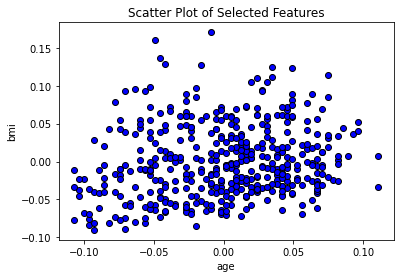

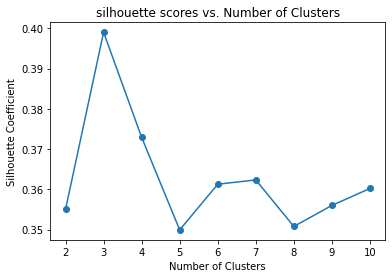

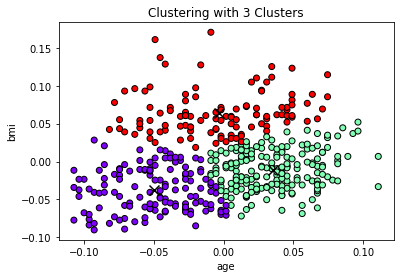

Report:
Based on the selected features (e.g., age and BMI), the data has been segmented into clusters.
The optimal number of clusters using Silhouette Coefficient: 3
You can analyze the characteristics of each cluster to understand how patients are segmented.
These clusters might have implications in healthcare, e.g., tailoring treatments or interventions for specific segments.


In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load the diabetes dataset
data = load_diabetes()
X = data.data  # Features
feature_names = data.feature_names

# Step 2: Perform exploratory data analysis
# You can print feature names, summary statistics, histograms, etc.
print(data.DESCR)

# Step 3: Select two features for clustering (e.g., age and BMI)
selected_feature_indices = [0, 2]  # You can change these indices as per your interest
selected_features = X[:, selected_feature_indices]
# print(selected_features)

# Step 4: Visualize selected features using a scatter plot
plt.scatter(selected_features[:, 0], selected_features[:, 1], c='blue', marker='o', edgecolors='k')
plt.title("Scatter Plot of Selected Features")
plt.xlabel(feature_names[selected_feature_indices[0]])
plt.ylabel(feature_names[selected_feature_indices[1]])
plt.show()

# Step 5: Implement K-means clustering for a range of cluster numbers
ranges = range(2, 11)
# inertia_values = []
silhouette_scores = []

for n in ranges:
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(selected_features)
    # inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(selected_features, labels))

plt.plot(ranges, silhouette_scores, marker='o')
plt.title("silhouette scores vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
    
# Step 6: Determine the optimal number of clusters using Silhouette Coefficient or inertia
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2
# optimal_clusters_inertia = np.argmin(np.diff(inertia_values)) + 2

# Step 7 & 8: Visualize clusters using scatter plot and Analyze characteristics of each cluster
# You can calculate cluster statistics, visualize cluster centroids, etc.
best_kmeans = KMeans(n_clusters=optimal_clusters_silhouette, random_state=42)
best_labels = best_kmeans.fit_predict(selected_features)

plt.scatter(selected_features[:, 0], selected_features[:, 1], c=best_labels, marker='o', edgecolors='k', cmap='rainbow')
plt.scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1], c='black', marker='x', s=100)
plt.title(f"Clustering with {optimal_clusters_silhouette} Clusters")
plt.xlabel(feature_names[selected_feature_indices[0]])
plt.ylabel(feature_names[selected_feature_indices[1]])
plt.show()

# Step 9: Write a report discussing patient segments, implications, and uses
print("Report:")
print("Based on the selected features (e.g., age and BMI), the data has been segmented into clusters.")
print(f"The optimal number of clusters using Silhouette Coefficient: {optimal_clusters_silhouette}")
print("You can analyze the characteristics of each cluster to understand how patients are segmented.")
print("These clusters might have implications in healthcare, e.g., tailoring treatments or interventions for specific segments.")



## Assignment 4: Clustering Penguins and Evaluating with External Measure

### Objective:
Cluster the penguin dataset and evaluate the clustering results using an external measure.

### Dataset:
Palmer Penguins dataset, available in the `seaborn` library or on GitHub.

### Tasks:
1. Load the Palmer Penguins dataset.
2. Perform exploratory data analysis to understand the features and distributions.
3. Preprocess the data: handle missing values, encode categorical variables, and normalize the data.
4. Implement K-means clustering.
5. Determine the optimal number of clusters using either the Silhouette Coefficient or inertia.
6. Visualize the clusters using appropriate visualization techniques.
7. Use an external measure (e.g., Adjusted Rand Index, Normalized Mutual Information) to evaluate the clustering results against the true species labels.
8. Write a report discussing your findings, the effectiveness of the clustering, and the evaluation results using the external measure.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550

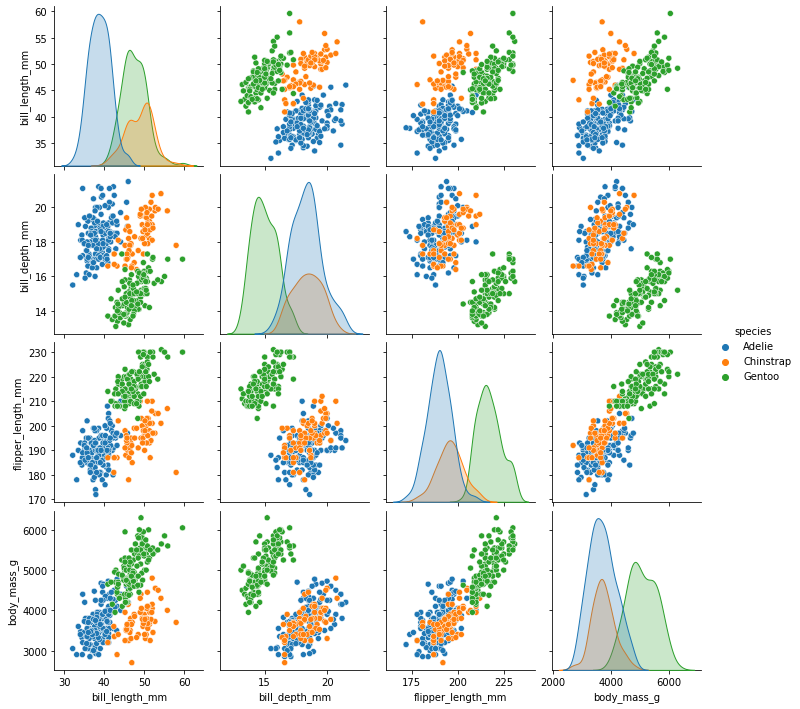

ValueError: could not convert string to float: 'Torgersen'

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA

# Step 1: Load the Palmer Penguins dataset
penguins = sns.load_dataset("penguins")

# Step 2: Perform exploratory data analysis (EDA)
# Display basic information about the dataset
print(penguins.info())
# Display summary statistics
print(penguins.describe())
# Visualize distributions, relationships, etc.
sns.pairplot(penguins, hue="species")
plt.show()

# Step 3: Preprocess the data
# Handle missing values (remove rows with missing values)
penguins = penguins.dropna()

# Encode categorical variables (species)
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
penguins['species'] = penguins['species'].map(species_mapping)

# Normalize the data
scaler = StandardScaler()
penguins_normalized = scaler.fit_transform(penguins.drop('species', axis=1))

# Step 4: Implement K-means clustering
min_clusters = 2
max_clusters = 10
inertia_values = []
silhouette_scores = []

for n in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(penguins_normalized)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(penguins_normalized, kmeans.labels_))

# Step 5: Determine the optimal number of clusters using silhouette score
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters

# Step 6: Visualize clusters using PCA and scatter plot
pca = PCA(n_components=2)
penguins_pca = pca.fit_transform(penguins_normalized)
best_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
best_kmeans.fit(penguins_normalized)
labels = best_kmeans.labels_

plt.scatter(penguins_pca[:, 0], penguins_pca[:, 1], c=labels, marker='o', edgecolors='k', cmap='rainbow')
plt.scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1], c='black', marker='x', s=100)
plt.title(f"Clustering with {optimal_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Step 7: Use external measures for evaluation
true_labels = penguins['species'].values
adjusted_rand = adjusted_rand_score(true_labels, labels)
normalized_mutual_info = normalized_mutual_info_score(true_labels, labels)

# Step 8: Write a report discussing your findings and evaluation results
print("Report:")
print("The Palmer Penguins dataset was analyzed and preprocessed.")
print("K-means clustering was applied to the normalized data.")
print(f"The optimal number of clusters appears to be around {optimal_clusters}.")
print("The clusters were visualized using PCA and scatter plots.")
print(f"Evaluation using Adjusted Rand Index: {adjusted_rand:.4f}")
print(f"Evaluation using Normalized Mutual Information: {normalized_mutual_info:.4f}")
